In [1]:
import numpy as np
from thefittest.optimizers import SaDE2005
from thefittest.benchmarks import Rastrigin
from thefittest.tools import donothing


n_dimension = 10
left_border = -4.5
right_border = 4.5


number_of_iterations = 1500
population_size = 100


left_border_array = np.full(
    shape=n_dimension, fill_value=left_border, dtype=np.float64)
right_border_array = np.full(
    shape=n_dimension, fill_value=right_border, dtype=np.float64)

model = SaDE2005(fitness_function=Rastrigin(),
                 genotype_to_phenotype=donothing,
                 iters=number_of_iterations,
                 pop_size=population_size,
                 left=left_border_array,
                 right=right_border_array,
                 show_progress_each=100,
                 minimization=True,
                 keep_history=True)

model.fit()


fittest = model.get_fittest()
genotype, phenotype, fitness = fittest.get()
print('The fittest individ:', phenotype)
print('with fitness', fitness)

stats = model.get_stats()


0 iteration with fitness = -101.26443317581702
100 iteration with fitness = -13.677775013667757
200 iteration with fitness = -4.625054441490109
300 iteration with fitness = -0.10628649430968906
400 iteration with fitness = -2.1269326992978677e-06
500 iteration with fitness = -2.688338440748339e-11
600 iteration with fitness = -0.0
700 iteration with fitness = -0.0
800 iteration with fitness = -0.0
900 iteration with fitness = -0.0
1000 iteration with fitness = -0.0
1100 iteration with fitness = -0.0
1200 iteration with fitness = -0.0
1300 iteration with fitness = -0.0
1400 iteration with fitness = -0.0
The fittest individ: [-5.40052387e-10 -1.16441351e-10  6.79797833e-11 -1.13784634e-09
  7.02490507e-11  1.90623204e-10 -1.53056121e-09  7.17780039e-10
  6.26714499e-10 -1.03306131e-09]
with fitness -0.0


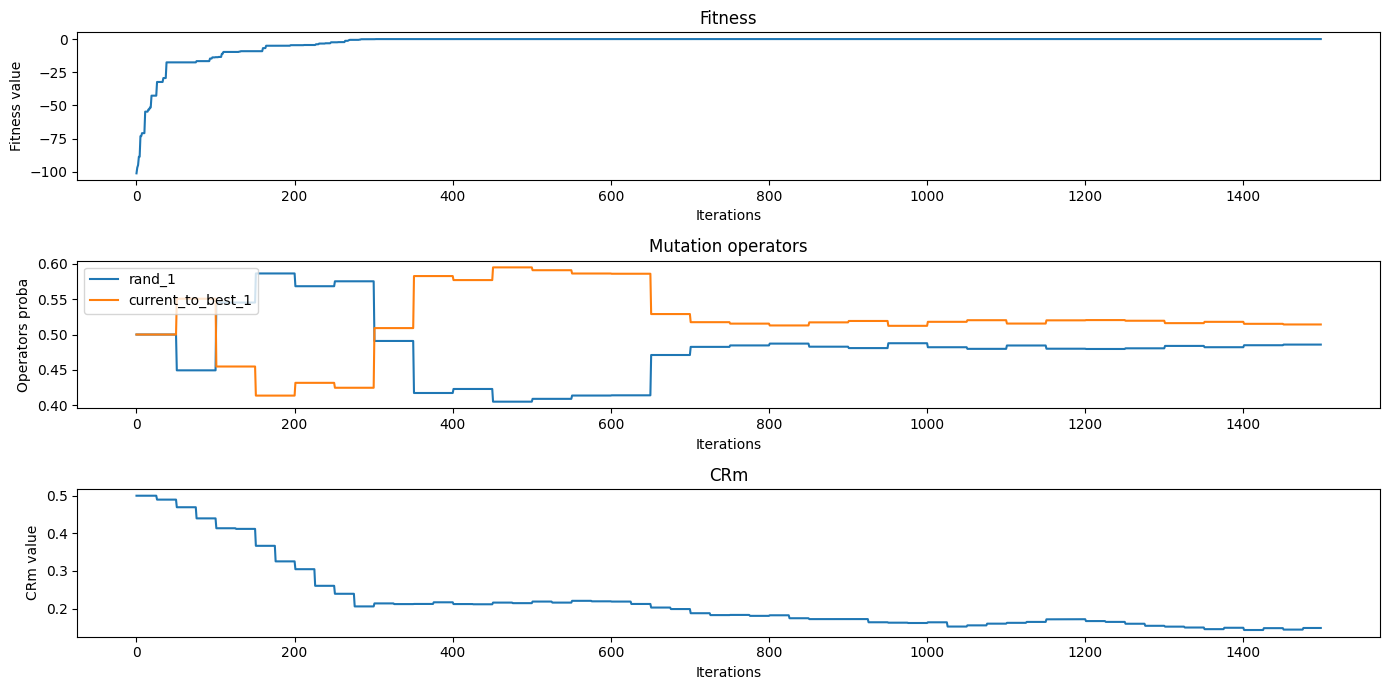

In [2]:
import matplotlib.pyplot as plt


m_proba = {}
for m_proba_i in stats['m_proba']:
        for key, value in m_proba_i.items():
            if key not in m_proba.keys():
                m_proba[key] = [value]
            else:
                m_proba[key].append(value)

fig, ax = plt.subplots(figsize=(14, 7), ncols=1, nrows=3)

ax[0].plot(range(number_of_iterations-1), stats['fitness_max'])
ax[0].set_title('Fitness')
ax[0].set_ylabel('Fitness value')
ax[0].set_xlabel("Iterations")


for key, value in m_proba.items():
    ax[1].plot(range(number_of_iterations-1), value, label=key)
ax[1].legend(loc="upper left")
ax[1].set_title('Mutation operators')
ax[1].set_ylabel('Operators proba')
ax[1].set_xlabel("Iterations")

ax[2].plot(range(number_of_iterations-1), stats['CRm'])
ax[2].set_title('CRm')
ax[2].set_ylabel('CRm value')
ax[2].set_xlabel("Iterations")


plt.tight_layout()
plt.show()